In this exercise, we practice to combine autoencoder and GAN on MNIST dataset. Feed mnist image to encoder and decoder and add the discriminator on top of the generated images.

From the previous exercise, we know that we could get a feature of input image from the encoder, in this exercise, the objective is to seperate the encoded feature into two parts, style and content. In each iteration, we feed one pair of image into encoder that the two input images have same content(digit number) but different style (stroke width, writing style, rotation angle and etc.) The idea to separate them is to swap the two parts of features and reconstruct input images with swapped features. 

First try only with autoencoder to complete this task, and then we add discriminator, to see the difference before autoencoder only and autoencoder+GAN.  

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' 

In [2]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/MNIST_data")


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [11]:
img_labels = mnist.train.labels
imgs = mnist.train.images
img_zero = imgs[img_labels==0]
img = []
for i in range(10):
    img.append(imgs[img_labels==i])

img_clustered = np.array(img)

(5444, 784)


In [4]:
def conv2d_withwb(x,k_w=3,k_h=3,input_channel=1,output_channel=8,stride=1,name='conv2d',reuse=False):
    # k_w: kernel width
    # k_h: kernel height
    # s: stride
    with tf.variable_scope(name) as scope:
        if(reuse):
            tf.get_variable_scope().reuse_variables() 
        w = tf.get_variable('w',[k_w,k_h,input_channel,output_channel],initializer=tf.truncated_normal_initializer(stddev=0.02))
        b = tf.get_variable('b',[output_channel], initializer=tf.constant_initializer(0))
    
    return tf.nn.conv2d(x, w,strides=[1,s,s,1],padding='SAME') + b
    

TO DO TASK:

According to your experience, build up your encoder with any architecture that you are comfortable with. If not work, try another one :)

In [6]:
def encoder(x):
    with tf.variable_scope('encoder') as scope:
        
        
    return x

In [ ]:
def deconv2d(x,k_w=3,k_h=3,s=2,output_shape=[1,1,1,1],padding='SAME',name='deconv',reuse=False):
    with tf.variable_scope(name) as scope:
        if(reuse):
            tf.get_variable_scope().reuse_variables() 
        w = tf.get_variable('w',[k_w,k_h,output_shape[-1], int(x.get_shape()[-1])], initializer=tf.truncated_normal_initializer(stddev=0.1))
        b = tf.get_variable('b',[output_shape[-1]],initializer=tf.constant_initializer(0.1))
    
    return tf.nn.conv2d_transpose(x,w, output_shape=output_shape,strides=[1,s,s,1],padding=padding)+b


TO DO TASK:

According to your experience, build up your decoder with any architecture that you are comfortable with. If not work, try another one :)

Note that: MNIST data has the range (0,1), so we use sigmoid as the activation function for the last layer in decoder.

In [7]:
def decoder(x):
    with tf.variable_scope('decoder') as scope:
        
               
    return tf.nn.sigmoid(x)

TO DO TASK:

According to your experience, build up your discriminator with any architecture that you are comfortable with. If not work, try another one :)

In [ ]:
def discriminator(x,batch_size,reuse=False):
    with tf.variable_scope('discriminator_simple', reuse=reuse) as scope:
        
       
    
    return out_layer


In [8]:
batch_size = 16

# sess = tf.Session()
x1_placeholder = tf.placeholder(tf.float32, shape = [batch_size,28,28,1],name='x1') #Placeholder for input images to the discriminator
x2_placeholder = tf.placeholder(tf.float32, shape = [batch_size,28,28,1],name='x2') #Placeholder for input images to the discriminator
x3_placeholder = tf.placeholder(tf.float32, shape = [batch_size,28,28,1],name='x3') #Placeholder for input images to the discriminator
xtest_placeholder = tf.placeholder(tf.float32, shape = [batch_size,28,28,1],name='xtest') #Placeholder for input images to the discriminator


TO DO TASK:

Process the feature according to the following steps:

1. Get the feature from encoder. In the same iteration, we should share weights for different input image.

2. seperate the feature into two parts, part1=[:,0:sep_size] and part2=[:,sep_size:]. The sep_size is the size that how much you want to set for part 1 and the rest goes to part 2. For example, if the size of feautre is 64 and you set sep_size as 10, then part1 has 10 elements, and part2 has 54 elements. Try different number of sepsize and see what happens. You can try sep_size=feature_size/2  and sep_size=2.

3. Concatenate the swapped feature along the last axis (axis=-1)

4.

In [9]:
feature1 = encoder(x1_placeholder) # get the feature from input images 1
feature2 = encoder(x2_placeholder,reuse=True) # get the feature from input images 2. If share weights, set reuse=True in the second call


sep_size = 

# seperate the feature into two parts
feature1_1 = 
feature1_2 = 

feature2_1 = 
feature2_2 = 

# swap the feature and concanate them along the last channel (axis=-1)
feature1_2_2_1 = 
feature2_1_1_2 = 

# Reconstruct the image with the swapped features
x2_1_1_2 = decoder(feature2_1_1_2)
x1_2_2_1 = decoder(feature1_2_2_1,reuse=True)


# Reconstruct the image from the feature obtained from encoder. Similar to previous autoencoder.
x1_estimate = decoder(feature1,reuse=True)
x2_estimate = decoder(feature2,reuse=True)



In [ ]:
feature3 = encoder(x3_placeholder,reuse=True)
feature3_1 = feature3[:,0:sep_size]
feature3_1_1_2 = tf.concat(axis=-1,values=[feature3_1,feature1_2])

feature3 = encoder(x3_placeholder,reuse=True)
feature3_1 = feature3[:,0:sep_size]
feature3_1_1_2 = tf.concat(axis=-1,values=[feature3_1,feature1_2])
x3_1_1_2 = decoder(feature3_1_1_2,reuse=True)

featuretest = encoder(xtest_placeholder,reuse=True)
featuretest_1 = featuretest[:,0:sep_size]
featuretest_1_1_2 = tf.concat(axis=-1,values=[featuretest_1,feature1_2])

xtest_1_1_2 = decoder(featuretest_1_1_2,reuse=True)

TO DO TASK:

Complete the L2 reconstruction loss and the swap loss. We still use L2 norm distance to compute the swap loss

In [10]:
l2_loss = 

swap_loss = 


In [11]:
tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'discriminator' in var.name]
g_vars = [var for var in tvars if 'g_' in var.name]

TO DO task:

Input the loss into trainer G

In [ ]:
learning_rate = 0.0002
adam = tf.train.AdamOptimizer(learning_rate=learning_rate)

trainerG = adam.minimize(, var_list=g_vars)

Run the cell below when using GAN. 

In [ ]:
inputD_x = tf.concat(axis=-1, values=[x2_placeholder, x1_placeholder])
Dx = discriminator_fc(inputD_x,batch_size) #Dx will hold discriminator prediction probabilities for the real MNIST images

inputD_g = tf.concat(axis=-1, values=[x2_placeholder, x3_1_1_2])
Dg = discriminator_fc(inputD_g,batch_size, reuse=True) #Dg will hold discriminator prediction probabilities for generated images

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Dg, labels = tf.ones_like(Dg))) # ensure forward compatibility: function needs to have logits and labels args explicitly used

d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Dx, labels = tf.ones_like(Dx)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Dg, labels = tf.zeros_like(Dg)))
d_loss = d_loss_real + d_loss_fake

trainerD = adam.minimize(d_loss, var_list=d_vars)

In [ ]:
num_steps = 1000000
batch_size = 16
n = int(np.sqrt(batch_size))

display_step = 1500

Step 1: Minibatch Loss: 0.166693
Original Images


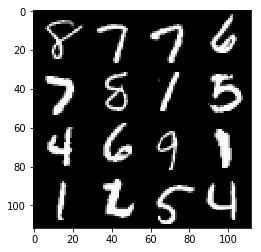

Reconstructed Images


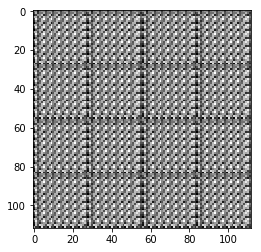

Step 2000: Minibatch Loss: 0.002448
Original Images


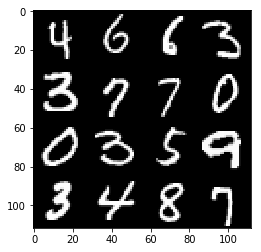

Reconstructed Images


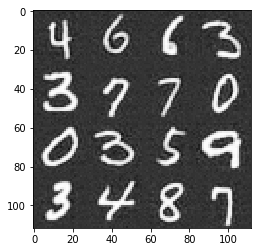

Step 4000: Minibatch Loss: 0.001495
Original Images


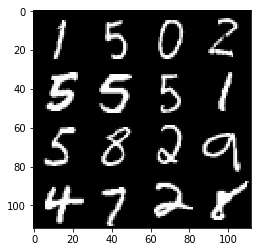

Reconstructed Images


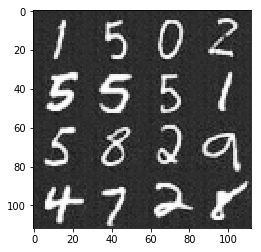

Step 6000: Minibatch Loss: 0.000966
Original Images


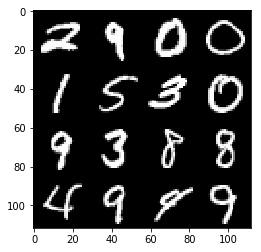

Reconstructed Images


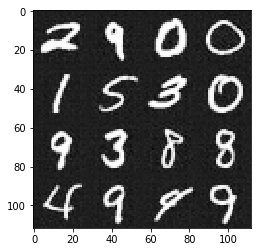

Step 8000: Minibatch Loss: 0.000599
Original Images


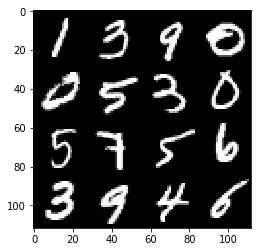

Reconstructed Images


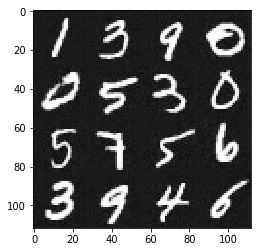

Step 10000: Minibatch Loss: 0.000510
Original Images


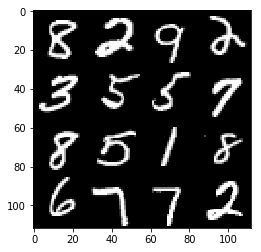

Reconstructed Images


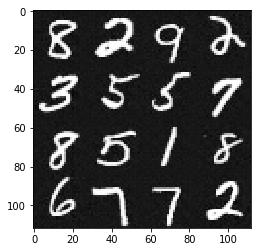

Step 12000: Minibatch Loss: 0.000374
Original Images


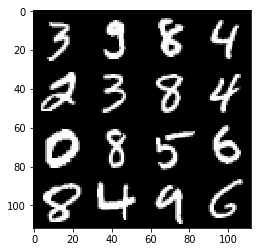

Reconstructed Images


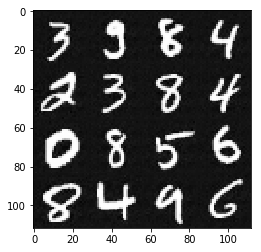

Step 14000: Minibatch Loss: 0.000320
Original Images


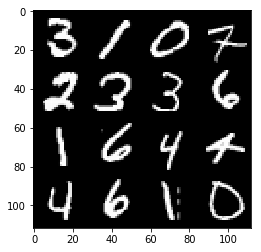

Reconstructed Images


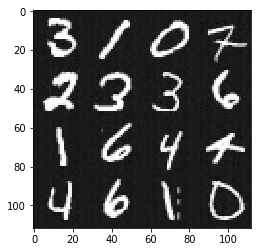

Step 16000: Minibatch Loss: 0.000360
Original Images


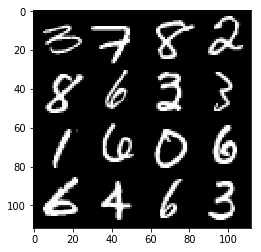

Reconstructed Images


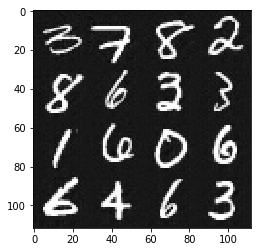

Step 18000: Minibatch Loss: 0.000215
Original Images


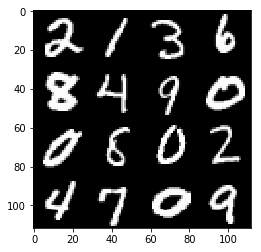

Reconstructed Images


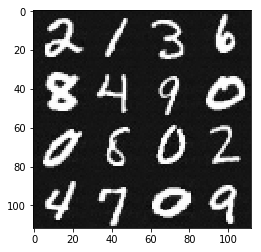

Step 20000: Minibatch Loss: 0.000221
Original Images


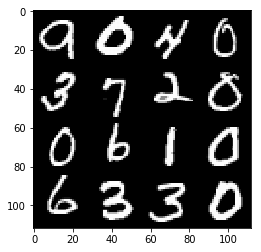

Reconstructed Images


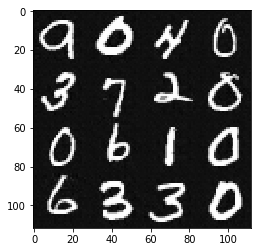

Step 22000: Minibatch Loss: 0.000222
Original Images


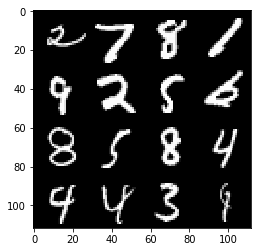

Reconstructed Images


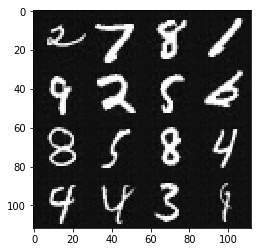

KeyboardInterrupt: 

In [20]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(tf.global_variables_initializer())

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
         
        imgs_1 = []
        imgs_2 = []
        imgs_3 = []
        imgs_test = []
        for _ in range(batch_size):
            a = random.randint(0,9)
            img_set = img_clustered[a]
            b = random.randint(0,len(img_set)-1)
            img_1 = img_set[b].reshape([28,28,1])
            imgs_1.append(img_1)
            b = random.randint(0,len(img_set)-1)
            img_2 = img_set[b].reshape([28,28,1])
            imgs_2.append(img_2)
            
            
            b = random.randint(0,len(img_set)-1)
            img_test = img_set[b].reshape([28,28,1])
            imgs_test.append(img_test)
            
            
            a = random.randint(0,9)
            img_set = img_clustered[a]
            b = random.randint(0,len(img_set)-1)
            img_3 = img_set[b].reshape([28,28,1])
            imgs_3.append(img_3)

        imgs_1 = np.array(imgs_1)
        imgs_2 = np.array(imgs_2)
        imgs_3 = np.array(imgs_3)
        
        _, l, swap_loss_value= sess.run([trainerG, l2_loss, swap_loss], 
                                 feed_dict={x1_placeholder: imgs_1,
                                            x2_placeholder:imgs_2,
                                            x3_placeholder:imgs_3,
                                           xtest_placeholder:imgs_test})
        
        # Uncomment this line if use GAN
#         _,d_loss_value = sess.run([trainerD, d_loss],feed_dict={x1_placeholder: imgs_1,
#                                                          x2_placeholder:imgs_2,
#                                                          x3_placeholder:imgs_3,
#                                                          xtest_placeholder:imgs_test}) #Update the discriminator
        
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: L2 Loss: %f, Swap Loss: %f' % (i, l, swap_loss_value))
            
            l2_loss_value,g_loss_value, img1_2_2_1,img2_1_1_2,x1_recon,x2_recon, imgtest_1_1_2, img3_1_1_2  = sess.run([ l2_loss,g_loss,
                                   x1_2_2_1,x2_1_1_2,x1_estimate,x2_estimate, xtest_1_1_2, x3_1_1_2], 
                                   feed_dict={x1_placeholder: imgs_1,
                                              x2_placeholder:imgs_2,
                                              x3_placeholder:imgs_3,
                                             xtest_placeholder:imgs_test})
  
            intev = 28*n+20
            canvas_orig = np.ones((28 * n , 28 * n + intev))
            canvas_recon = np.ones((28 * n , 28 * n + intev))
            canvas_swap = np.ones((28 * n , 28 * n + intev))
          
            
            img1_2_2_1 = (img1_2_2_1+1)/2
            img2_1_1_2 = (img2_1_1_2+1)/2
            
            for i in range(n):

                # Display original images
#                 print('left: input 1.  Right: input 2')
                for j in range(n):
                    # Draw the original digits
                    canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                        imgs_1[n*i+j].reshape([28, 28])
                    canvas_orig[i * 28:(i + 1) * 28 , j * 28 +intev:(j + 1) * 28+ intev] = \
                        imgs_2[n*i+j].reshape([28, 28])
                    
                    
                # Display reconstructed images
                for j in range(n):
                    # Draw the reconstructed digits
                    canvas_swap[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                        imgs_test[n*i+j].reshape([28, 28])
                    canvas_swap[i * 28:(i + 1) * 28, j * 28 + intev : (j + 1) * 28 + intev] = \
                        imgtest_1_1_2[n*i+j].reshape([28, 28])
                   
                for j in range(n):
                    # Draw the reconstructed digits
                    canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                        imgs_3[n*i+j].reshape([28, 28])
                    canvas_recon[i * 28:(i + 1) * 28, j * 28 + intev : (j + 1) * 28 + intev] = \
                        img3_1_1_2[n*i+j].reshape([28, 28])
                   

            print("Original Images. Left is input 1, right is input2")
            plt.figure(figsize=(n, n))
            plt.imshow(canvas_orig, origin="upper", cmap="gray")
            plt.show()
            
            print("Reconstructed Images from a combination of one part from randomly picked image and the other part from input 1.")
            plt.figure(figsize=(n, n))
            plt.imshow(canvas_recon, origin="upper", cmap="gray")
            plt.show()

            print("Reconstructed Images from a combination of one part from randomly picked image and the other part from input 1")
            plt.figure(figsize=(n, n))
            plt.imshow(canvas_swap, origin="upper", cmap="gray")
            plt.show()